In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

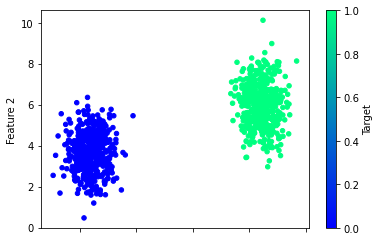

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-08-15 10:02:33.900894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.9760
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.8200
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.8027
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

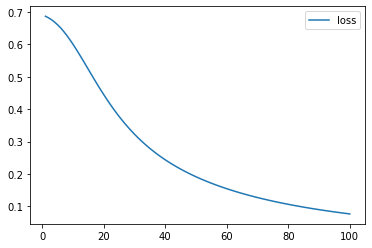

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

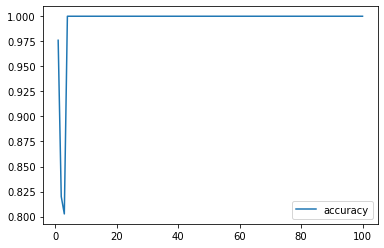

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0776 - accuracy: 1.0000 - 190ms/epoch - 24ms/step
Loss: 0.0776485875248909, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 82ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

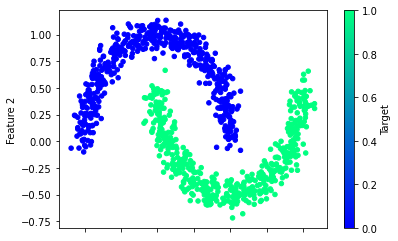

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
 1/24 [>.............................] - ETA: 20s - loss: 1.1045 - accuracy: 0.4688

2022-08-15 10:37:30.897477: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'


24/24 [==============================] - 1s 3ms/step - loss: 1.0404 - accuracy: 0.4840
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9430 - accuracy: 0.5027
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8744 - accuracy: 0.5173
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8245 - accuracy: 0.5240
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7860 - accuracy: 0.5293
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7554 - accuracy: 0.5373
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.5467
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.5520
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5560
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6691 - accuracy: 0.5613
Epoch 11/100
24/24 [=

24/24 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8547
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3025 - accuracy: 0.8547
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8573
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8573
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8587
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8600
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.8627
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8640
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8653
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8667
Epoch 93/100


<AxesSubplot:>

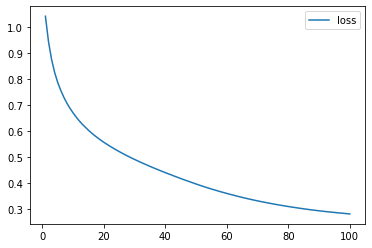

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

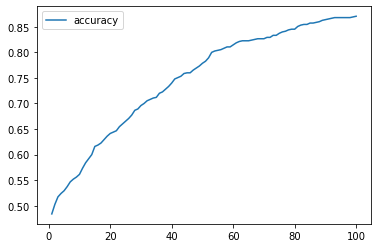

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.7040
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.8320
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8787
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8867
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8960
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8960
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8960
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8960
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8947
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.8947
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9040
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9040
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9053
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9053
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9053
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9040
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9053
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9067
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9067
Epoch 93/100
